# 3. Pre-Processing <a id="data_wrangling"></a>

<a id="contents"></a>
# Table of Contents  
3.1. [Introduction](#introduction) <br>
3.2. [Imports](#imports)  <br>
3.3. [Data Processing](#process)<br>
3.4. [Data Splitting](#split)<br>
3.5. [Save Updated Data](#save)

## 3.1 Introduction<a id="introduction"></a>

The goal of this notebook is to create a cleaned development dataset to be used to complete the modeling step of my project.

## 3.2 Imports<a id="imports"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/Users/heatheradler/Documents/GitHub/Springboard/Springboard_Projects/Capstone 3/df_eda.csv')
print("Dataset loaded.")

# Print dataset columns to verify
print(df.columns)

Dataset loaded.
Index(['city', 'street_address', 'state', 'zipcode', 'house_type', 'price',
       'bathrooms', 'bedrooms', 'school_rating', 'yearBuilt', 'latitude',
       'longitude', 'sqft', 'heating', 'cooling', 'parking', 'basement',
       'tax_assessed_value', 'tax_amount', 'stories', 'lot_size_sqft',
       'borough', 'bathrooms_binned'],
      dtype='object')


## 3.3 Data Processing

In [2]:
# Define target variable and features
target = 'price'
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if target in numeric_features:
    numeric_features.remove(target)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Apply log transformation to the target variable
df[target] = np.log1p(df[target])

# Define preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [3]:
df = df.drop(['street_address','parking', 'city' ], axis=1)

In [4]:
# Replace less frequent categories with 'Other'
counts = df['house_type'].value_counts()
mask = df['house_type'].isin(counts[counts < 130].index)
df.loc[mask, 'house_type'] = 'Other'

# Convert house_type to categorical
df['house_type'] = pd.Categorical(df['house_type'])

In [5]:
df.house_type = pd.Categorical(df.house_type)
df.house_type = df.house_type.cat.codes

In [6]:
df.borough = pd.Categorical(df.borough)
df.borough = df.borough.cat.codes

In [7]:
df.zipcode = pd.Categorical(df.zipcode)
df.zipcode = df.zipcode.cat.codes

/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_2337/4108956755.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'house_type'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'school_rating'}>,
        <Axes: title={'center': 'yearBuilt'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'heating'}>,
        <Axes: title={'center': 'cooling'}>],
       [<Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'tax_assessed_value'}>,
        <Axes: title={'center': 'tax_amount'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'lot_size_sqft'}>,
        <Axes: title={'center': 'borough'}>,
        <Axes: title={'center': 'bathrooms_binned'}>, <Axes: >]],
      dtype=object)

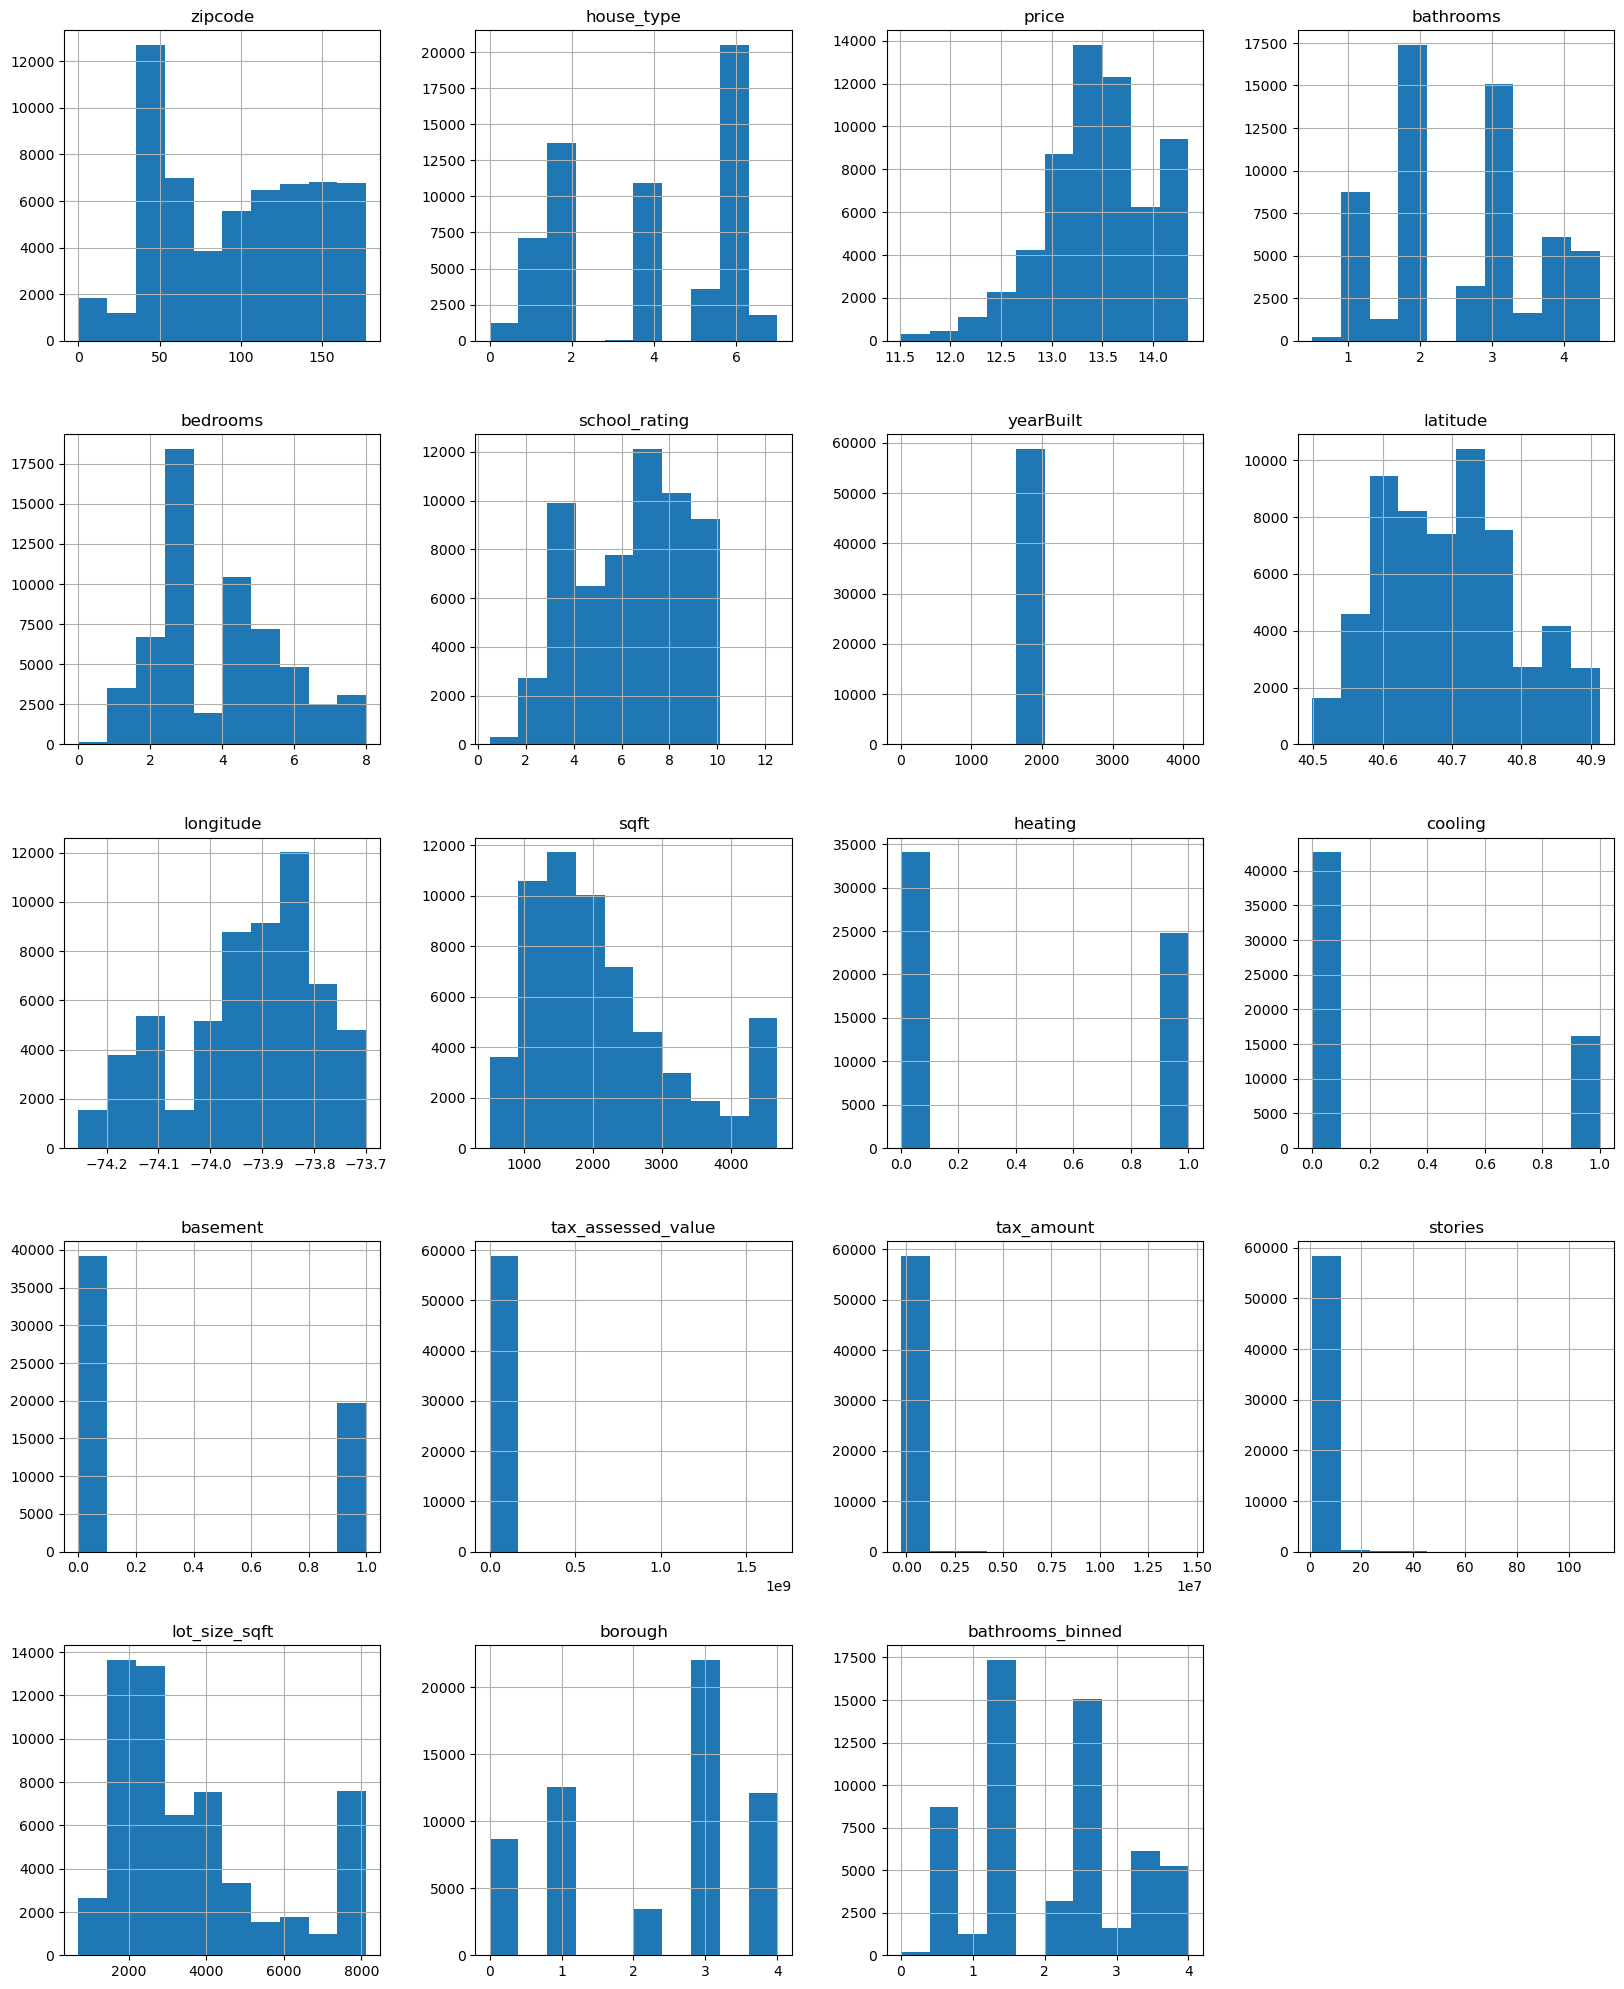

In [8]:
# Let's check the distribution of our features to better understand a better type of imputation
fig = plt.figure(figsize = (20,25))
ax = fig.gca()
df.hist(ax = ax)

## 3.4 Data Splitting

In [9]:
# Assuming 'price' is the target variable
X = df.drop(target, axis=1)
y = df[target]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features using RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)
         
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.5 Save Updated Data

In [10]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (47085, 18)
Test data shape: (11772, 18)


In [11]:
# Save preprocessed data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train.to_numpy())
np.save('y_test.npy', y_test.to_numpy())

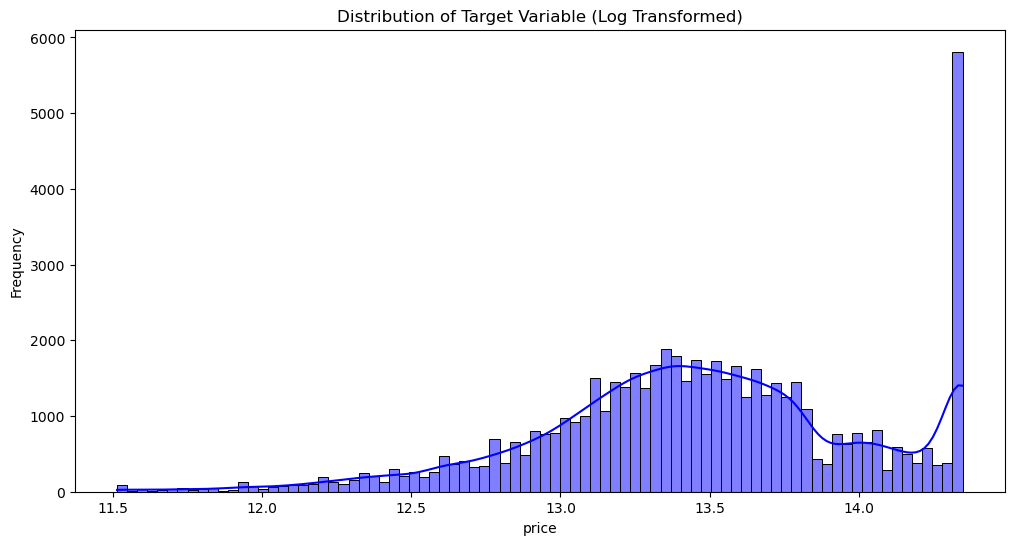

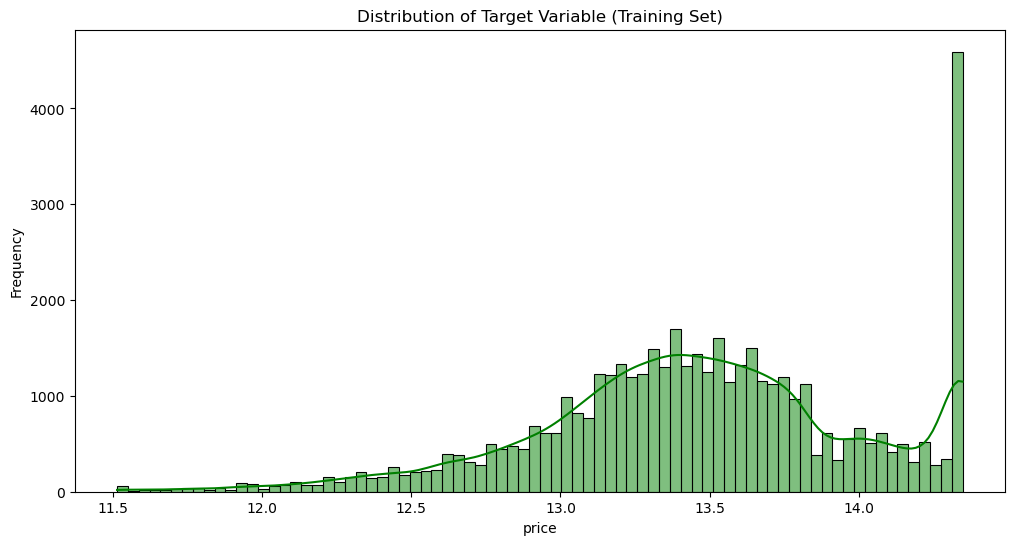

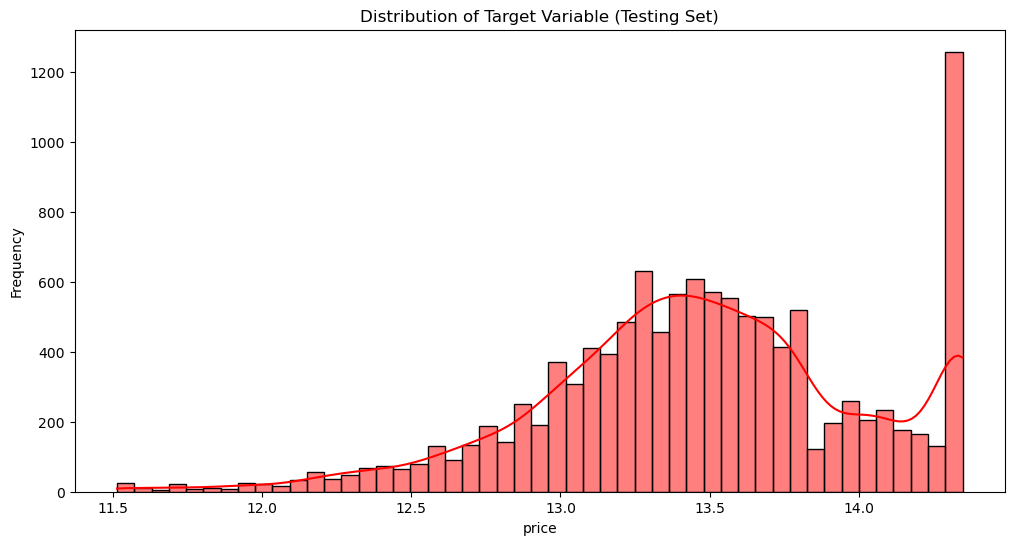

In [14]:
# Visualize the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.histplot(df[target], kde=True, color='blue')
plt.title('Distribution of Target Variable (Log Transformed)')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution in the training set
plt.figure(figsize=(12, 6))
sns.histplot(y_train, kde=True, color='green')
plt.title('Distribution of Target Variable (Training Set)')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution in the testing set
plt.figure(figsize=(12, 6))
sns.histplot(y_test, kde=True, color='red')
plt.title('Distribution of Target Variable (Testing Set)')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()